# Lab Enhancement - K-means Clustering
by: Chay Wen Ning (1201103431)

---

## Introduction
K-Means is one of the most popular unsupervised machine learning algorithms used for clustering. The goal of K-Means is to partition a dataset into K distinct, non-overlapping subsets (clusters) where each data point belongs to the cluster with the nearest mean (centroid).

In this lab enhancement, we clafiy on the importance of feature scaling in machine learning. Analysis in this lab enhancement builds upon the foundational principles of K-Means as explored in the original lab material. We will explore other variants of K-Means algorithm, such as Mini-Batch K-Means and K-Medoids to compare suitability of K-Means in different datasets. The concept of K-Means is also applied in image compression to showcase their real-world applications.

## Objectives
1. Learn the importance of Feature Scaling.
2. Learn the differences between K-means variations (Mini-batch K-means, K-medoids).
3. Learn how to use the scikit-learn's K-means package.
4. Learn how to use the scikit-learn's K-medoids package.
5. Learn how to use the scikit-learn-extra's Mini-Batch K-Means package.
6. Learn how to apply K-means in image compression.

In [ ]:
# If not already installed, do:
# pip install -U scikit-learn
# pip install matplotlib

# The library used for K-Means is from scikit-learn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from time import time


## Feature scaling

Feature scaling is a crucial preprocessing step in many machine learning algorithms, including K-Means clustering. It is a technique used in data preprocessing to
normalize the range of independent features, transforming the values of features to a similar scale to improve the performance of machine learning algorithms.

Example below shows the computational time of K-Means with feature scaling and without feature scaling. The impact of feature scaling can be summarized as follows:

### 1. Equal Importance to Features:
- **Normalization of Scales:** Different features in a dataset may have different units and scales. For example, one feature could be in the range of 0 to 1, while another could range from 0 to 1000. Feature scaling ensures that each feature contributes equally to the distance calculations used in K-Means clustering.

- **Prevents Dominance of High-Range Features:** Without scaling, features with larger ranges will dominate the distance calculations, potentially leading to suboptimal clustering results.

### 2. Improved Convergence:
- **Accelerated Convergence:** Scaling features can lead to faster convergence of the K-Means algorithm. When features are on a similar scale, the algorithm can find the optimal cluster centers more efficiently.

- **Stable Performance:** Feature scaling helps in achieving a more stable and reliable performance of the K-Means algorithm.

### 3. Enhanced Interpretability:
- **Better Cluster Separation:** Scaling features often results in better-defined and more interpretable clusters. This is particularly important in high-dimensional spaces where the differences in scales can significantly distort the clustering outcome.

- **Improved Visualization:** When visualizing clusters in a lower-dimensional space (e.g., using PCA or t-SNE), scaled features provide a clearer representation of the clusters.

### 4. Reduced Impact of Outliers:
- **Mitigated Influence of Outliers:** Feature scaling can reduce the impact of outliers. In unscaled data, outliers in features with larger ranges can disproportionately influence the clustering process.



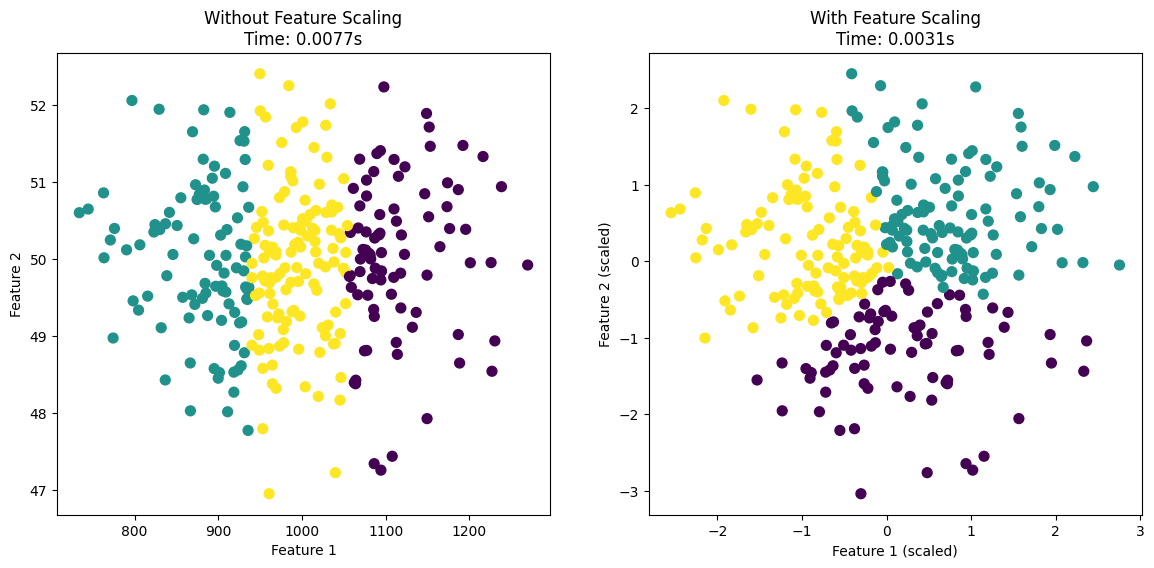

In [ ]:
# Generate sample data with different scales
np.random.seed(0)
X = np.random.randn(300, 2) * [100, 1] + [1000, 50]

# K-Means without scaling
start_time = time()
kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
kmeans_time = time() - start_time

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("Without Feature Scaling\nTime: {:.4f}s".format(kmeans_time))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means with scaling
start_time = time()
kmeans_scaled = KMeans(n_clusters=3, n_init = "auto")
kmeans_scaled.fit(X_scaled)
y_kmeans_scaled = kmeans_scaled.predict(X_scaled)
kmeans_scaled_time = time() - start_time

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_scaled, s=50, cmap='viridis')
plt.title("With Feature Scaling\nTime: {:.4f}s".format(kmeans_scaled_time))
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

plt.show()

## K-Means Variations

Facilitating the process of clustering, there are several other variations of K-Means that use different strategies to address different aspects of clustering challenges or constraints. For the lab enhancement, we will compare two other K-Means variations:
- **Mini-Batch K-Means**
- **K-Medoids**

### Mini-Batch K-Means
Mini Batch K-means algorithm's main idea is to process small random subsets (mini-batches) of data of a fixed size, to reduce computation time.

The mini batch K-means is faster but gives slightly different results than the normal batch K-means. Here we cluster a set of data, first with K-Means and then with Mini-Batch K-means, and plot the results.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

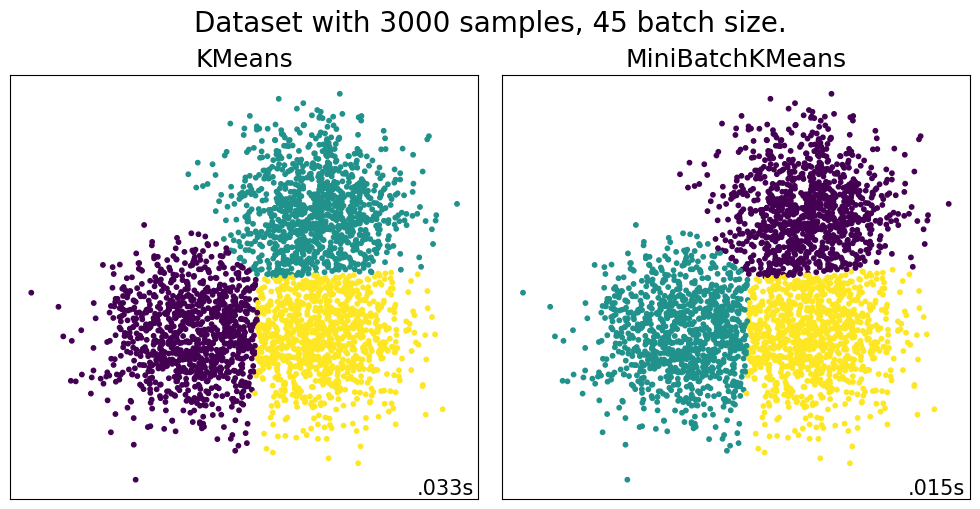

In [ ]:
# The library used for Mini-Batch K-Means is from scikit-learn
from sklearn.cluster import MiniBatchKMeans

n_samples = 3000
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)

kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=None)
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, batch_size=batch_size, random_state=None)

clustering_algorithms = [
    ("KMeans", kmeans),
    ("MiniBatchKMeans", minibatch_kmeans),
]

# Construct dataset
X, _ = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=0.7,
    random_state=0
)

X = StandardScaler().fit_transform(X)

plot_num = 1
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.85, wspace=0.05, hspace=0.18)

for name, algorithm in clustering_algorithms:
  t0 = time()
  algorithm.fit(X)
  t1 = time()

  if hasattr(algorithm, "labels_"):
      y_pred = algorithm.labels_.astype(int)
  else:
      y_pred = algorithm.predict(X)

  plt.subplot(1, 2, plot_num)
  plt.title(name, size=18)

  plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

  plt.xticks(())
  plt.yticks(())
  plt.text(
      0.99,
      0.01,
      ("%.3fs" % (t1 - t0)).lstrip("0"),
      transform=plt.gca().transAxes,
      size=15,
      horizontalalignment="right",
  )
  plt.suptitle(
      f"Dataset with {n_samples} samples, {batch_size} batch size.",
      size=20,
  )
  plot_num += 1


As the number of clusters and the number of data increases, the relative saving in computational time also increases.

The saving in computational time is more noticeable only when the number of clusters is very large.

The effect of the batch size on the computational time is also more evident when the number of clusters is larger.

Hence, we can conclude the following differences between K-Means and Mini-Batch K-Means:

| Feature | K-Means | Mini-Batch K-Means |
|---------|---------|--------------------|
| Computational Efficiency | Less efficient for very large datasets | More efficient for very large datasets |
| Memory Usage | High, processes the entire dataset at once |	Lower, processes data in mini-batches |
| Convergence Speed	| Slower on large datasets | Faster due to incremental updates |
| Suitability	| Suitable for small to moderate datasets	| Suitable for very large datasets|


K-Means is a good choice for smaller datasets where memory and computational efficiency are not major concerns. It tends to be more stable and provides slightly better clustering quality due to processing the entire dataset in each iteration.

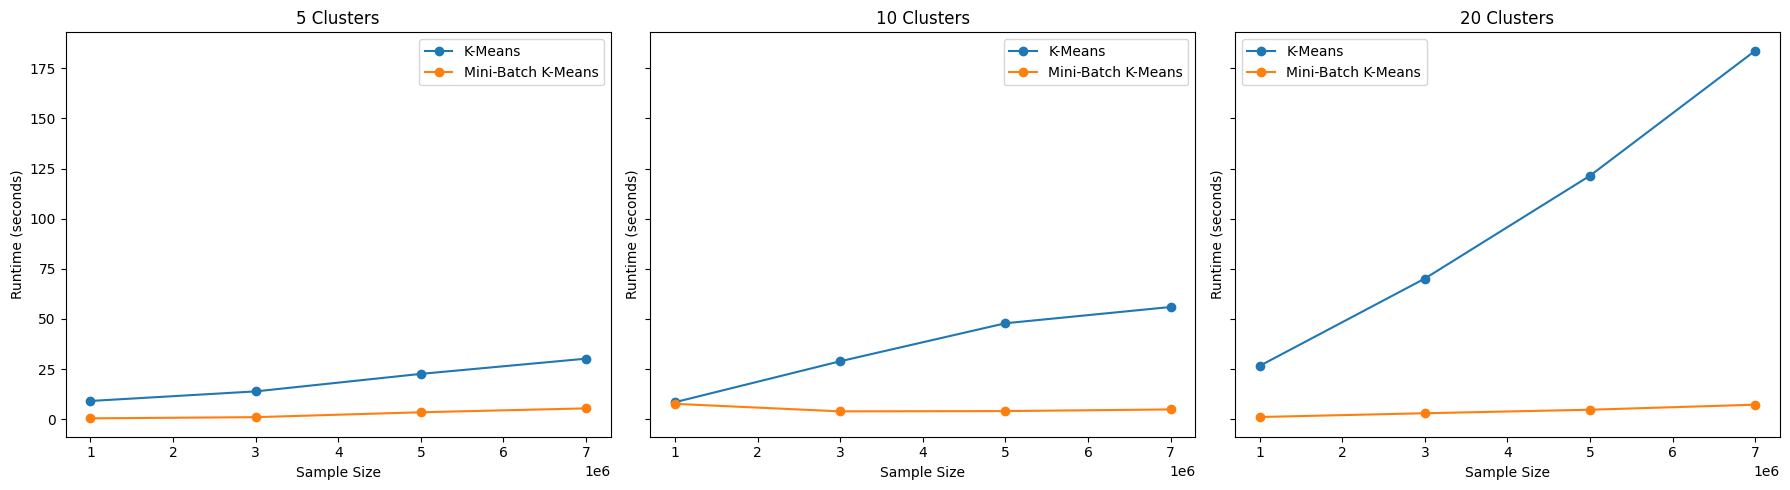

In [ ]:
# Define sample sizes and number of clusters
sample_sizes = [1_000_000, 3_000_000, 5_000_000, 7_000_000]
n_clusters_list = [5, 10, 20]

# Function to determine batch size based on sample size
def get_batch_size(n_samples):
    if n_samples < 1000:
        return max(10, int(0.1 * n_samples))  # 10% to 50%
    elif n_samples < 10000:
        return max(10, int(0.05 * n_samples))  # 1% to 10%
    else:
        return max(10, int(0.01 * n_samples))  # 0.1% to 1%

# Dictionary to store the runtimes
runtimes = {
    "KMeans": {n_clusters: [] for n_clusters in n_clusters_list},
    "MiniBatchKMeans": {n_clusters: [] for n_clusters in n_clusters_list}
}

for n_samples in sample_sizes:
    # Using centers=10 with varying number of clusters to create a more challenging clustering problem (making the clustering task more realistic and difficult)
    X, _ = make_blobs(n_samples=n_samples, centers=10, cluster_std=1.0, random_state=0)

    for n_clusters in n_clusters_list:
        # K-Means
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        start_time = time()
        kmeans.fit(X)
        runtime = time() - start_time
        runtimes["KMeans"][n_clusters].append(runtime)

        # Mini-Batch K-Means
        batch_size = get_batch_size(n_samples)
        mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, batch_size=batch_size, random_state=0)
        start_time = time()
        mini_batch_kmeans.fit(X)
        runtime = time() - start_time
        runtimes["MiniBatchKMeans"][n_clusters].append(runtime)

# Plot the results
fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(18, 5), sharey=True)

for i, n_clusters in enumerate(n_clusters_list):
    ax = axes[i]
    ax.plot(sample_sizes, runtimes["KMeans"][n_clusters], label="K-Means", marker='o')
    ax.plot(sample_sizes, runtimes["MiniBatchKMeans"][n_clusters], label="Mini-Batch K-Means", marker='o')
    ax.set_title(f"{n_clusters} Clusters")
    ax.set_xlabel("Sample Size")
    ax.set_ylabel("Runtime (seconds)")
    ax.legend()

plt.tight_layout()
plt.show()

### K-Medoids

K-Medoids, or Partitioning Around Medoids (PAM), is similar to the K-Means clustering method but requires the use of medians for the formation of subgroups. It uses actual data points (medoids) as cluster centers, making it more robust to outliers.

In this example we exhibit the results of K-Means, Mini-Batch K-Means, and K-Medoids on a dataset with outliers (a corrupted dataset). K-Medoids is the most stable algorithm for this application.

We can conclude the the following differences between K-Means and K-Medoids:

| Feature | K-Means | K-Medoids |
|---------|---------|-----------|
| Computational Efficiency |	Generally faster due to simpler updates	| Slower due to more complex updates (need to calculate all pairwise distances within clusters) |
| Sensitivity to Outliers	| Sensitive to outliers, which can skew centroids	| More robust to outliers |
| Cluster Shape |	Assumes spherical clusters| Can handle arbitrary-shaped clusters |
| Suitability	| Suitable for small to moderate, clean datasets | Suitable for small datasets with outliers or varying cluster shapes |

K-Means is efficient and works well for small to moderate datasets with spherical clusters. However, it is sensitive to outliers and the initial selection of centroids.

In [19]:
# The library used for K-Medoids is from scikit-learn-extra
# if not installed do pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.utils import shuffle

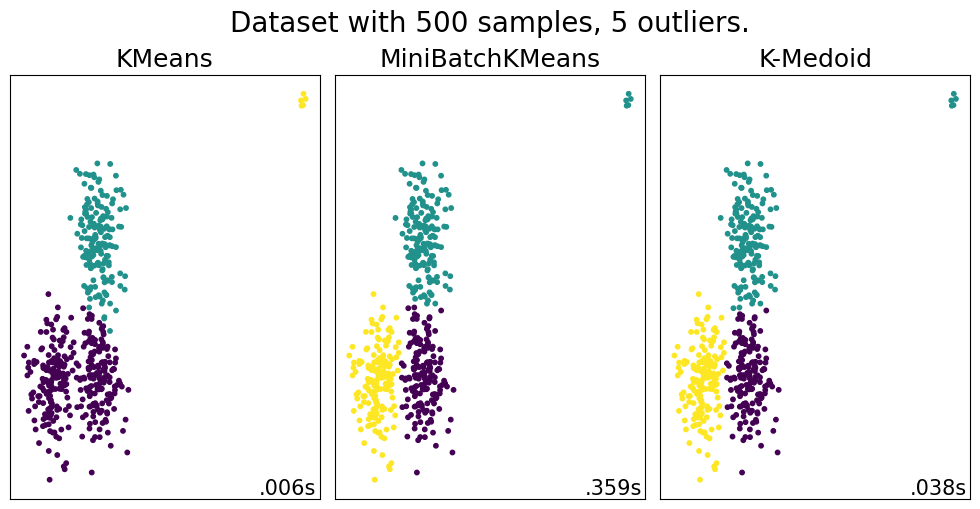

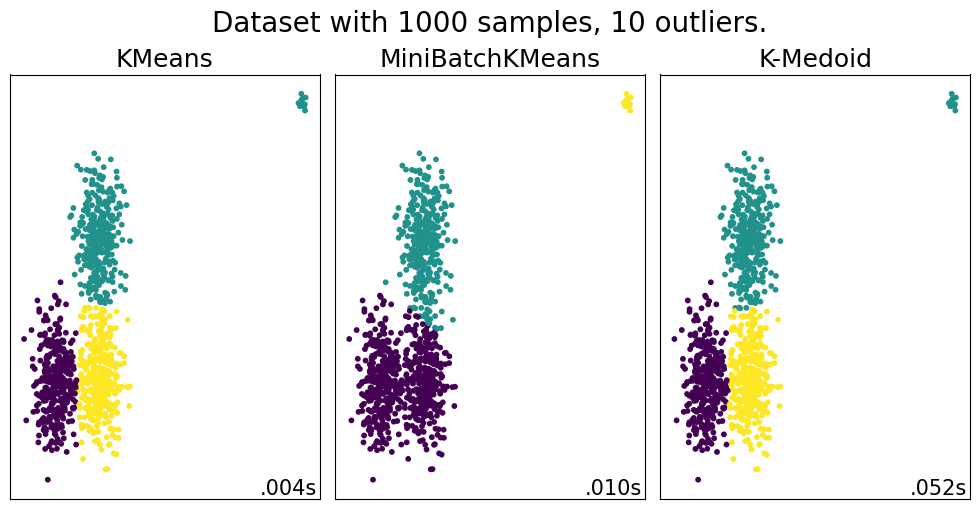

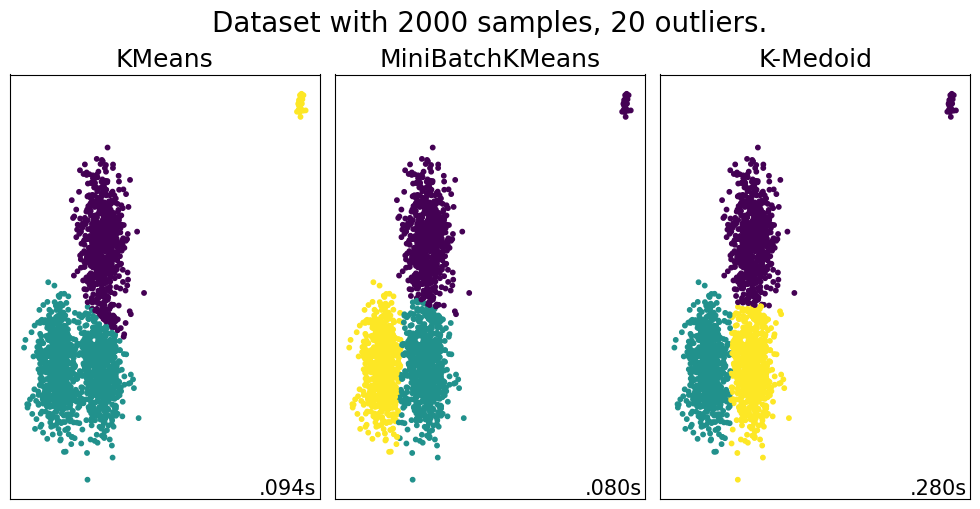

In [ ]:
# Run the code multiple times to see the stability between each algorithm

rng = np.random.RandomState(42)
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)

kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=None)
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init="auto", batch_size=100, random_state=None)
kmedoids = KMedoids(n_clusters=n_clusters, random_state=None)

clustering_algorithms = [
    ("KMeans", kmeans),
    ("MiniBatchKMeans", minibatch_kmeans),
    ("K-Medoid", kmedoids)
]

for n_samples in [500, 1000, 2000]:
  # Construct dataset with outliers
  X, _ = make_blobs(
      n_samples=n_samples,
      centers=centers,
      cluster_std=0.5,
      random_state=0
  )

  # Change the first 1% entries to outliers
  for f in range(int(n_samples / 100)):
      X[f] = [10, 3] + rng.normal(size=2) * 0.1
  # Shuffle the data so that we don't know where the outlier is.
  X = shuffle(X, random_state=rng)

  X = StandardScaler().fit_transform(X)

  plot_num = 1
  fig = plt.figure(figsize=(10, 5))
  plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.85, wspace=0.05, hspace=0.18)

  for name, algorithm in clustering_algorithms:
    t0 = time()
    algorithm.fit(X)
    t1 = time()

    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(1, 3, plot_num)
    plt.title(name, size=18)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.3fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plt.suptitle(
        f"Dataset with {n_samples} samples, {n_samples // 100} outliers.",
        size=20,
    )
    plot_num += 1


## K-Means Real-World Application: Image Compression

After understanding the suitability of K-Means algorithm in different datasets, we know that K-Means works well with small to moderate datasets, where clusters are spherical or globular in shape.


Example Datasets for K-Means includes the iris dataset, market segmentation, image compression, document clustering, and anomaly detection.


In this lab enhancement, we will look at image compression using the K-means clustering algorithm.

In [15]:
# Mounting Google Drive (to get image)
from google.colab import drive
drive.mount('/content/drive')

import os

# Change the path to where you run the Jupyter Notebook from.
notebook_path = r"/content/drive/MyDrive/Trimester 2/Machine Learning/Assignment/MLIsFun/1_LabEnhancement_KMeans"

import os
os.chdir(notebook_path)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Trimester 2/Machine Learning/Assignment/MLIsFun/1_LabEnhancement_KMeans


### Steps

1. Read the Image: Load the image into a numpy array.
2. Reshape the Image Data: Convert the 2D image into a 2D array where each row represents a pixel and each column represents the color channels (e.g. RGB).
3. Apply K-Means: Cluster the pixel colors using K-Means.
4. Map Pixels to Cluster Centers: Replace each pixel with its corresponding cluster center.
5. Reshape Back to Image Dimensions: Convert the 2D array back into the original image dimensions.
6. Save or Display the Compressed Image: Save or display the resulting compressed image.

By adjusting the number of clusters used for the compression, the level of compression can be controlled. However, too much compression can result in loss of detail and reduced image quality. A smaller number of clusters will result in higher compression but lower image quality, while a larger number will preserve more details but with less compression. Hence, it is important to strike a balance between compression and image quality when using this technique.

In [20]:
# Library used to read images and save images
# if not installed do pip install -U scikit-image
from skimage.io import imread

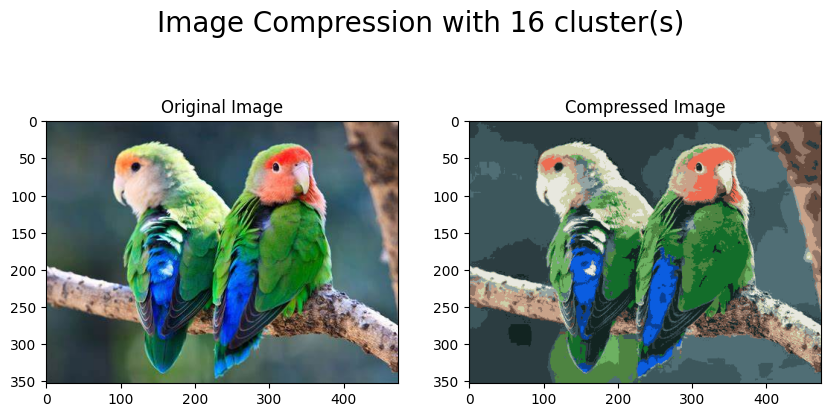

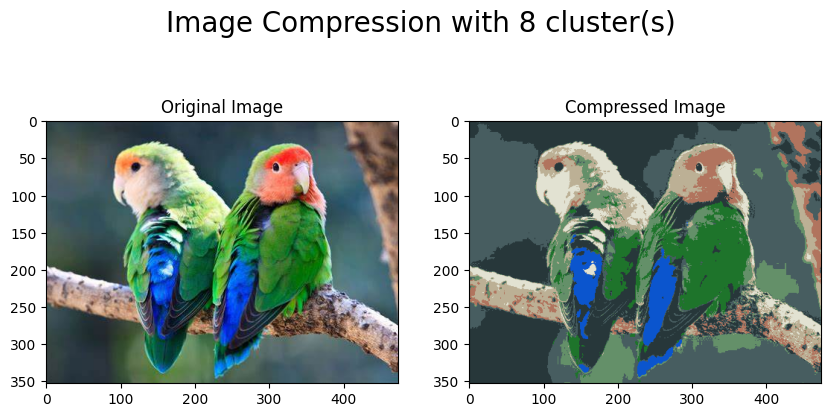

In [16]:
image_path = 'birds.jpg'
clusters = [16, 8] # compare number of clusters to the level of compression


# Compress image using K-Means
def compress_image(image, n_clusters):
    # Reshape the Image Data
    pixels = image.reshape(-1, 3)

    # Cluster the pixel colors using K-Means
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(pixels)

    # Store cluster centers in array
    new_colors = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape array back to Image Dimensions
    compressed_image = new_colors.reshape(image.shape)
    compressed_image = np.clip(compressed_image, 0, 255).astype('uint8')
    return compressed_image


# Read and compress each image
compressed_images = []
for n_clusters in clusters:
    # Load the image into a numpy array
    image = imread(image_path)
    compressed_image = compress_image(image, n_clusters)
    compressed_images.append(compressed_image)

    # Display the original and compressed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title('Compressed Image')
    plt.suptitle(
        f"Image Compression with {n_clusters} cluster(s)",
        size=20,
    )
    plt.show()
